In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the preprocessed dataset
df = pd.read_csv("../data/processed_bitcoin_prices.csv", parse_dates=["Date"], index_col="Date")

# Display dataset
df.head()

,Open,High,Low,Close,Volume,Close_Scaled,Prediction
Date,,,,,,,
2021-01-02,32127.267578,33155.117188,29091.181641,29376.455078,67865420765,0.150436,0.191803
2021-01-03,32782.023438,34608.558594,32052.316406,32129.408203,78665235202,0.180901,0.196436
2021-01-04,31971.914062,33440.218750,28722.755859,32810.949219,81163475344,0.188443,0.218320
2021-01-05,33992.429688,34437.589844,30221.187500,31977.041016,67547324782,0.179215,0.240058
2021-01-06,36824.363281,36879.699219,33514.035156,34013.613281,75289433811,0.201752,0.234042


In [20]:
# Function to create sequences of past n_steps days
def create_sequences(data, n_steps=30):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

# Set the number of past days to use for predictions
n_steps = 30

# Prepare input (X) and target (y)
X, y = create_sequences(df["Close_Scaled"].values, n_steps)

# Split into training (80%) and testing (20%) sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape input for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print shapes
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (1154, 30, 1)
Testing data shape: (289, 30, 1)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

# Define a more powerful LSTM model
model = Sequential([
    Input(shape=(n_steps, 1)),  # Input shape: 30 days, 1 feature
    LSTM(100, return_sequences=True),  # Increase LSTM neurons
    Dropout(0.3),
    LSTM(50, return_sequences=False),
    Dropout(0.3),
    Dense(25),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model again
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0175 - val_loss: 0.0027
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0017 - val_loss: 0.0067
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0017 - val_loss: 0.0091
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0015 - val_loss: 0.0027
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 9.8495e-04 - val_loss: 0.0042
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0010 - val_loss: 0.0025
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 8.5199e-04 - val_loss: 0.0012
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 12/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 3

73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 6.3746e-04 - val_loss: 5.3107e-04
Epoch 67/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 5.6951e-04 - val_loss: 9.5137e-04
Epoch 68/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 5.3646e-04 - val_loss: 7.1029e-04
Epoch 69/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 5.5070e-04 - val_loss: 0.0029
Epoch 70/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 5.7306e-04 - val_loss: 6.9939e-04
Epoch 71/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 5.8741e-04 - val_loss: 0.0026
Epoch 72/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 5.5456e-04 - val_loss: 5.3528e-04
Epoch 73/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 6.6130e-04 - val_loss: 8.1763e-04
Epoch 74/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 5.5884e-04 - val_loss: 5.1676e-04
Epoch 75/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 6.4736e-04 - val_loss: 5.6572e-04
Epoch 76/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 5.9938e-04

In [22]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Save the new model
model.save("../models/lstm_model.keras")
print("✅ LSTM model retrained and saved!")



Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 5.8627e-04 - val_loss: 8.4582e-04
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 5.2193e-04 - val_loss: 7.5508e-04
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 5.4401e-04 - val_loss: 5.5180e-04
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 4.8099e-04 - val_loss: 8.2620e-04
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 5.8950e-04 - val_loss: 0.0014
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 4.4364e-04 - val_loss: 8.0086e-04
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 5.2807e-04 - val_loss: 4.7756e-04
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 5.5194e-04 - val_loss: 6.2189e-04
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 4.8580e-04 - val_loss: 4.4845e-04
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 5.0755e-04 - val_loss: 0.0013
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 4.9974e-04 - val_

In [23]:
# Make predictions
predictions = model.predict(X_test)

# Convert predictions back to original scale
predictions_rescaled = np.interp(predictions, (0, 1), (df["Close"].min(), df["Close"].max()))
y_test_rescaled = np.interp(y_test, (0, 1), (df["Close"].min(), df["Close"].max()))

# Calculate error metrics
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
Mean Absolute Error (MAE): 1483.71
Mean Squared Error (MSE): 4086376.42


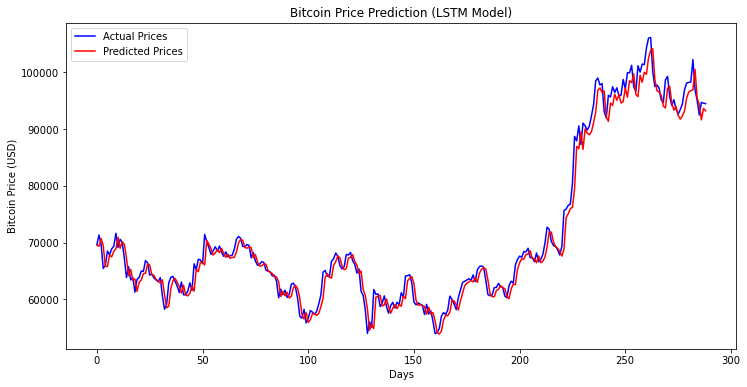

In [24]:
# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Prices", color="blue")
plt.plot(predictions_rescaled, label="Predicted Prices", color="red")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Bitcoin Price (USD)")
plt.title("Bitcoin Price Prediction (LSTM Model)")
plt.show()
